# Capstone Project - The Battle of the Neighborhoods (Part2/Week2)
### Applied Data Science Capstone by IBM/Coursera

### Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis using ML](#analysis)
* [Results](#results)
* [Discussion & Further Recommendation](#discussion)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to find similarity within the city's neighborhoods, if a user or agent wants to move or shift from his current city locality to another city. 
The target audience or the stakeholders can be either an individual looking to relocate or a business contractor who wants to start or expand his business to new city. This project will focus on 3 cities **London, Sydney and Singapore**. It's all about **understanding the locality**

Moving or establishing to a new city is always exciting. However, with the excitement comes difficulties. Sometimes, essentials such as food, transportation, water, accommodation, competitors, supplies etc. need more focus and planning.
Also comes the **Cultural Shocks**.

We will use our data science powers to generate a few most promissing neighborhoods based on the stakeholders criteria, **recommend them a cluster of Neighborhoods with desired venues based on their choice of city**.

<img src='./img/House.png'>Importance of House</img>

<img src='./img/Location.png'>Importance of Business Location</img>

## Data <a name="data"></a>

Business problem defines the factors that will influence our decisions and recommendations which are:
* Cities with business facilities
* Location within the city closer to the centre of the city
* Location co-ordinates mathcing the cities co-ordinates, as many areas or Borough exist in multiple cities.

Dataset used for the projects are collected to generate the required information are:
* **Geoname Dataset** for countries of **GB(Great Britain), AU(Australia), SG(Singapore)**, from the website www.geonames.org. 
* Various venues and their type and location in every neighborhood within each city will be obtained using **Foursquare API**

The above datasets will be used to create city based maps and find the neighborhood locations within the city using latitude and longitude co-ordinates. 
Foursquare API will give the types of venues for each neighborhoods so that they can be clustered among themselves to find related neighborhoods and recommend neighborhoods.

## Methodology  <a name="methodology"></a>

We use python libraries like, 
**numpy, pandas** to perform data exploration and numeric operations on the data which we extracted from geoname website for the countries where the cities belong to.
**Matplotlib** to plots graphical viz., **folium** to visualize geographic details such as maps of the cities, **geopy.geocoders** to get the geographic co-ordinates.
**sklearn** to bring in the unsupervised machine learning technique of Clustering using the method of KMeans, to cluster the neighborhoods based on the common venues identified by **FourSquare API**.


Importing libraries for the project

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Data Exploration
We load 3 cities data into pandas Dataframe, one after another into a datframe name by the city name itself.
Each city is taken from the country csv files, from which the Boroughs are selected.
Our dataset includes columns as country,postal code, neighborhoods, Country name, Boroughs/Areas, and co-ordinates.

#### Data Cleaning
We drop the columns from the dataset we downloaded from geoname,
Drop the duplicates neighborhoods after selecting the City as London, Sydney and Singapore to get uniques neighborhoods.
We get the clean data in the form of **Borough, Neighborhood, Latitude, Longitude**.

#### Storage
We use GitHub repository as a database to store all our codes, data, images, reports.

[Click here to GitHub link](https://github.com/rohanrao0725/Coursera_Capstone)

### London city data exploration

In [6]:
data = pd.read_csv('./datasets/GB.txt', header=None, sep='\t')

In [7]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,GB,DN14,Eastrington,England,ENG,East Riding of Yorkshire,11609011,NaN,NaN,53.7604,-0.7932,4.0
1,GB,DN14,Balkholme,England,ENG,East Riding of Yorkshire,11609011,NaN,NaN,53.7432,-0.8087,4.0


In [8]:
drop_cols = [0,1,3,4,6,7,8,11]

In [9]:
data.drop(drop_cols, axis=1, inplace=True)

In [10]:
data.rename(columns={2:'Neighborhood',5:'Borough',9:'Latitude',10:'Longitude'}, inplace=True)

In [11]:
data.head(2)

,Neighborhood,Borough,Latitude,Longitude
0,Eastrington,East Riding of Yorkshire,53.7604,-0.7932
1,Balkholme,East Riding of Yorkshire,53.7432,-0.8087


In [12]:
data['Borough'].unique() #Unique broughs in London

array(['East Riding of Yorkshire', 'Rutland', 'Shropshire', 'Wiltshire',
       'Isle of Wight', 'County of Bristol', 'Herefordshire',
       'Staffordshire', 'Suffolk', 'Surrey', 'Warwickshire',
       'West Sussex', 'Worcestershire', 'Greater London', 'Devon',
       'Northumberland', 'Cornwall', 'Buckinghamshire', 'Cambridgeshire',
       'Cumbria', 'Derbyshire', 'Dorset', 'East Sussex', 'Essex',
       'Gloucestershire', 'Hampshire', 'Hertfordshire', 'Kent',
       'Leicestershire', 'Lincolnshire', 'Norfolk', 'Northamptonshire',
       'North Yorkshire', 'Nottinghamshire', 'Oxfordshire', 'Somerset',
       'Lancashire', 'Durham', 'West Yorkshire', 'West Midlands',
       'Tyne and Wear', 'South Yorkshire', 'Merseyside',
       'Greater Manchester', 'Cheshire', 'Berkshire', 'Bedfordshire',
       'Denbighshire', 'Dumfries and Galloway', 'Flintshire',
       'Monmouthshire', 'Powys', 'Scottish Borders', 'Wrexham',
       'Guernsey Channel Islands', 'Hereford and Worcester', 'Belfast'

Selecting Greater London

In [13]:
neighborhood_data_lon = data.loc[data['Borough'].isin(['Greater London'])]

In [14]:
neighborhood_data_lon.shape

(876, 4)

In [15]:
neighborhood_data_lon = neighborhood_data_lon.drop_duplicates(subset=['Neighborhood'])

In [16]:
neighborhood_data_lon.shape

(721, 4)

In [17]:
#Rearranging columns
neighborhood_data_lon= neighborhood_data_lon[['Borough','Neighborhood','Latitude', 'Longitude']]
neighborhood_data_lon.head()

,Borough,Neighborhood,Latitude,Longitude
4025,Greater London,Bickley,51.4013,0.0458
4026,Greater London,Bromley,51.4061,0.0152
4027,Greater London,Hayes,51.3778,0.0191
4028,Greater London,Leaves Green,51.3700,0.0233
4029,Greater London,Keston,51.3623,0.0293


**NOTE**:
Limitations of using Free account of Foursquare api, lets only consider first 50 locations within Greater London

In [18]:
neighborhood_data_lon = neighborhood_data_lon.iloc[50:100,:]
neighborhood_data_lon.shape

(50, 4)

#### Lets create a map of Greater London city

In [19]:
address = 'London, GB'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London city are 51.5073219, -0.1276474.


In [20]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhood_data_lon['Latitude'], 
                                           neighborhood_data_lon['Longitude'],
                                           neighborhood_data_lon['Borough'],
                                           neighborhood_data_lon['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

Using data with the Folium library to explore the neighborhoods in Greater London map.

### Sydney City data exploration, 

In [21]:
data = pd.read_csv('./datasets/AU.txt', header=None, sep='\t')

In [22]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AU,200,Australian National University,Australian Capital Territory,ACT,CANBERRA,NaN,NaN,NaN,-35.2777,149.1189,1.0
1,AU,221,Barton,Australian Capital Territory,ACT,NaN,NaN,NaN,NaN,-35.3049,149.1412,4.0


In [23]:
drop_cols = [0,1,3,4,6,7,8,11]

In [24]:
data.drop(drop_cols, axis=1, inplace=True)

In [25]:
data.rename(columns={2:'Neighborhood',5:'Borough',9:'Latitude',10:'Longitude'}, inplace=True)

In [26]:
data.head()

,Neighborhood,Borough,Latitude,Longitude
0,Australian National University,CANBERRA,-35.2777,149.1189
1,Barton,NaN,-35.3049,149.1412
2,Jervis Bay,NEW CNTRY WEST,-35.1499,150.6969
3,Wreck Bay,NaN,-35.1648,150.6908
4,Hmas Creswell,NEW CNTRY WEST,-35.0280,150.5501


In [27]:
data['Borough'].unique()

array(['CANBERRA', nan, 'NEW CNTRY WEST', 'SYDNEY STREETS', 'BONDI',
       'LEICHHARDT', 'ST GEORGE', 'ILLAWARRA', 'CHATSWOOD', 'GOSFORD',
       'WARRINGAH', 'PARRAMATTA', 'RICHMOND', 'PENRITH', 'BANKSTOWN',
       'CAMPBELLTOWN', 'SYDNEY BOXES', 'PYMBLE', 'HUNTER',
       'NSW NORTH COAST', 'GOLD COAST', 'TOOWOOMBA SE CNR',
       'VIC FAR COUNTRY', 'DARWIN', 'ALICE SPRINGS', 'BRIS CITY CNTRY',
       'NORTHGATE CENT', 'NORTHGATE NORTH', 'UNDERWOOD CENT',
       'UNDERWOOD SOUTH', 'SUNSHINE MT ISA', 'CENTRAL QLD', 'NORTH QLD',
       'SA CITY SUBS', 'SA SUBS NEAR 1', 'SA SUBS NEAR 2', 'SA FAR',
       'TASMANIA', 'MELBOURNE CITY', 'MOORABBIN', 'MELB NORTH WEST',
       'FOOTSCRAY', 'PRESTON', 'HAWTHORN', 'RINGWOOD', 'FERNTREE GULLY',
       'MULGRAVE', 'DANDENONG', 'FRANKSTON', 'VIC COUNTRY', 'CURTIN',
       'STIRLING', 'BRAND', 'TANGNEY', 'KALGOORLIE'], dtype=object)

### Selecting sydney city

Sydney city data, lets consider Sydney, excluding Bondi as locations are more than 50

In [28]:
neighborhood_data_syd = data.loc[data['Borough'].isin(['SYDNEY STREETS', 'SYDNEY BOXES'])]

In [29]:
neighborhood_data_syd.shape

(30, 4)

In [30]:
neighborhood_data_syd = neighborhood_data_syd.drop_duplicates(subset=['Neighborhood'])

In [31]:
neighborhood_data_syd.shape

(24, 4)

In [32]:
#Rearranging columns
neighborhood_data_syd= neighborhood_data_syd[['Borough','Neighborhood','Latitude', 'Longitude']]
neighborhood_data_syd.head()

,Borough,Neighborhood,Latitude,Longitude
302,SYDNEY STREETS,Australia Square,-33.8707,151.2068
307,SYDNEY STREETS,Grosvenor Place,-33.8707,151.2068
312,SYDNEY STREETS,Royal Exchange,-33.8707,151.2068
317,SYDNEY STREETS,Queen Victoria Building,-33.8787,151.2053
322,SYDNEY STREETS,Sydney South,-33.8787,151.2053


#### Lets create a map of Sydney

In [33]:
address = 'Sydney, AU'

geolocator = Nominatim(user_agent="sy_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sydney city are -33.8548157, 151.2164539.


In [34]:
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhood_data_syd['Latitude'], 
                                           neighborhood_data_syd['Longitude'],
                                           neighborhood_data_syd['Borough'],
                                           neighborhood_data_syd['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sydney)  
    
map_sydney

Using data with the Folium library to explore the neighborhoods in Sydney map.

### Singapore city data exploration

In [35]:
data = pd.read_csv('./datasets/SG.txt', header=None, sep='\t')

In [36]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,SG,18906,Straits Boulevard,NaN,NaN,NaN,NaN,NaN,NaN,1.2758,103.8496,NaN
1,SG,18907,Straits Boulevard,NaN,NaN,NaN,NaN,NaN,NaN,1.2749,103.8517,NaN


In [37]:
drop_cols = [0,1,3,4,6,7,8,11]

In [38]:
data.drop(drop_cols, axis=1, inplace=True)

In [39]:
data.rename(columns={2:'Neighborhood',5:'Borough',9:'Latitude',10:'Longitude'}, inplace=True)

In [40]:
data.head(2)

,Neighborhood,Borough,Latitude,Longitude
0,Straits Boulevard,NaN,1.2758,103.8496
1,Straits Boulevard,NaN,1.2749,103.8517


In [41]:
#Fill Borough as singapore
data['Borough'].fillna('Singapore', inplace = True) 

Singapore city data

In [42]:
neighborhood_data_sgp = data

In [43]:
neighborhood_data_sgp = neighborhood_data_sgp.drop_duplicates(subset=['Neighborhood'])

In [44]:
neighborhood_data_sgp['Neighborhood'].unique()

array(['Straits Boulevard', 'Marina Gardens Drive', 'Central Boulevard',
       ..., 'Ponggol Seventeenth Avenue', 'Punggol Road - Track 19',
       'Ponggol Twenty-Fourth Avenue'], dtype=object)

In [45]:
neighborhood_data_sgp = data.loc[data['Neighborhood'].str.contains(r'Bedok|Hougang|Tampines')]

In [46]:
neighborhood_data_sgp.shape

(3804, 4)

In [47]:
neighborhood_data_sgp = neighborhood_data_sgp.drop_duplicates(subset=['Neighborhood'])

In [48]:
neighborhood_data_sgp.shape

(124, 4)

In [48]:
neighborhood_data_sgp = neighborhood_data_sgp.head(50)
neighborhood_data_sgp.shape
#print(neighborhood_data_sgp)

(50, 4)

In [49]:
neighborhood_data_sgp.head()

,Neighborhood,Borough,Latitude,Longitude
37659,Bedok Reservoir Road,Singapore,1.3304,103.9052
52950,Bedok South Avenue 1,Singapore,1.3209,103.9337
52954,Bedok South Avenue 2,Singapore,1.3222,103.9344
52962,Bedok South Road,Singapore,1.3204,103.9367
52994,Bedok South Avenue 3,Singapore,1.3225,103.9427


Lets create a Singapore Map

In [49]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore city are 1.3408630000000001, 103.83039182212079.


In [50]:
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhood_data_sgp['Latitude'], 
                                           neighborhood_data_sgp['Longitude'],
                                           neighborhood_data_sgp['Borough'],
                                           neighborhood_data_sgp['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

Using data with the Folium library to explore the neighborhoods in Singapore city map.

#### Foursquare API used below to explore the neighborhoods in the city. I have used the limit as 50 venue and the radius 500 meter for each neighborhoods to get the venues from their given latitude and longitude informations.

#### Define Foursquare Credentials and Version

**Note**:API credentials stored in a cofig file which is imported below for the security of API keys

In [51]:
import config_fs as cfg 

In [52]:
CLIENT_ID = cfg.clientid # your Foursquare ID
CLIENT_SECRET = cfg.clientsecret # your Foursquare Secret
VERSION = '20200810' # Foursquare API version


#### To use foursquare API and find venues in the neighborhoods of 3 cities

In [53]:
#London
neighborhood_data_lon.reset_index(inplace=True)
neighborhood_data_lon.drop('index', axis=1, inplace=True)
#Sydney
neighborhood_data_syd.reset_index(inplace=True)
neighborhood_data_syd.drop('index', axis=1, inplace=True)
#Singapore
neighborhood_data_sgp.reset_index(inplace=True)
neighborhood_data_sgp.drop('index', axis=1, inplace=True)

In [54]:
#London
print(neighborhood_data_lon.shape)
print(neighborhood_data_lon.head(2))
#Sydney
print(neighborhood_data_syd.shape)
print(neighborhood_data_syd.head(2))
#Singapore
print(neighborhood_data_sgp.shape)
print(neighborhood_data_sgp.head(2))

(50, 4)
          Borough Neighborhood  Latitude  Longitude
0  Greater London   Shoreditch   51.5251    -0.0769
1  Greater London      Stepney   51.5175    -0.0429
(24, 4)
          Borough      Neighborhood  Latitude  Longitude
0  SYDNEY STREETS  Australia Square  -33.8707   151.2068
1  SYDNEY STREETS   Grosvenor Place  -33.8707   151.2068
(50, 4)
           Neighborhood    Borough  Latitude  Longitude
0  Bedok Reservoir Road  Singapore    1.3304   103.9052
1  Bedok South Avenue 1  Singapore    1.3209   103.9337


In [55]:
LIMIT = 50
radius = 500

In [56]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [57]:
# ### Uncomment this to have check on the quota limit of using FourSquare API
# url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#             CLIENT_ID, 
#             CLIENT_SECRET, 
#             VERSION, 
#             lat, 
#             lng, 
#             radius, 
#             LIMIT)
# results = requests.get(url).json()
# results

### Exploring Neighboring venues in London by calling the API

In [59]:
london_venue = getNearbyVenues(names=neighborhood_data_lon['Neighborhood'],
                                   latitudes=neighborhood_data_lon['Latitude'],
                                   longitudes=neighborhood_data_lon['Longitude']
                                  )

Shoreditch
Stepney
Whitechapel
Rotherhithe
Wapping
Mile End Road
Shadwell
Commercial Road
Stepney Green
Spitalfields
Aldgate East
Leyton
Leyton Marshes
Lea Bridge
Wanstead
Leytonstone
Snaresbrook
Little Ilford
Manor Park
Aldersbrook
Plaistow
West Ham
Newham
Cubitt Town
Limehouse
Millwall
Poplar
Canary Wharf
Blackwall
Westferry
South Quay
London Arena
Coldharbour
All Saints
Heron Quays
West India Quay
Mudchute
East India Dock Road
Island Gardens
East India
Stratford
Pudding Mill Lane
Temple Mills
Stratford Marsh
Silvertown
North Woolwich
Custom House
Victoria Docks
Canning Town
Walthamstow


In [60]:
print(london_venue.shape)
london_venue.head()

(1426, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Shoreditch,51.5251,-0.0769,Dishoom,51.524515,-0.076850,Indian Restaurant
1,Shoreditch,51.5251,-0.0769,Burro e Salvia,51.524430,-0.074598,Italian Restaurant
2,Shoreditch,51.5251,-0.0769,citizenM London Shoreditch,51.524115,-0.078688,Hotel
3,Shoreditch,51.5251,-0.0769,Brat,51.524219,-0.077057,Wine Bar
4,Shoreditch,51.5251,-0.0769,FRAME,51.524629,-0.078449,Gym / Fitness Center


Venues returned by the API for each neighborhoods.

### Exploring Neighboring venues in Sydney

In [61]:
sydney_venue = getNearbyVenues(names=neighborhood_data_syd['Neighborhood'],
                                   latitudes=neighborhood_data_syd['Latitude'],
                                   longitudes=neighborhood_data_syd['Longitude']
                                  )

Australia Square
Grosvenor Place
Royal Exchange
Queen Victoria Building
Sydney South
Haymarket
Darlinghurst
Potts Point
Kings Cross
Sydney
Millers Point
The Rocks
Dawes Point
Eastern Suburbs Mc
The University Of Sydney
Ultimo
Broadway
Darlington
Chippendale
Pyrmont
Surry Hills
Woolloomooloo
Elizabeth Bay
Rushcutters Bay


In [62]:
print(sydney_venue.shape)
sydney_venue.head()

(1166, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Australia Square,-33.8707,151.2068,Grandma's Bar,-33.872138,151.205636,Cocktail Bar
1,Australia Square,-33.8707,151.2068,Kinokuniya,-33.872456,151.207525,Bookstore
2,Australia Square,-33.8707,151.2068,State Theatre,-33.871291,151.207049,Theater
3,Australia Square,-33.8707,151.2068,The Baxter Inn,-33.869707,151.205467,Whisky Bar
4,Australia Square,-33.8707,151.2068,Queen Victoria Building (QVB),-33.871734,151.206741,Shopping Mall


### Exploring Neighboring venues in Singapore

In [63]:
singapore_venue = getNearbyVenues(names=neighborhood_data_sgp['Neighborhood'],
                                   latitudes=neighborhood_data_sgp['Latitude'],
                                   longitudes=neighborhood_data_sgp['Longitude']
                                  )

Bedok Reservoir Road
Bedok South Avenue 1
Bedok South Avenue 2
Bedok South Road
Bedok South Avenue 3
Bedok North Road
Bedok North Street 4
Bedok North Avenue 4
Bedok North Street 2
Bedok North Avenue 3
Bedok North Street 1
Bedok Central
Bedok North Drive
Bedok North Avenue 2
Bedok North Avenue 1
Bedok North Street 3
Bedok Road
Bedok Rise
Upper Bedok Road
Jalan Langgar Bedok
Bedok Walk
Bedok Terrace
Bedok Lane
Bedok Garden
Bedok Close
Bedok Avenue
Bedok Reservoir Crescent
Bedok Reservoir View
Jalan Lembah Bedok
Bedok Industrial Park C
Bedok North Street 5
Bedok Place
Taman Bedok
Jalan Simpang Bedok
Bedok Ria Walk
Bedok Ria Terrace
Bedok Ria Place
Bedok Ria Crescent
Bedok Industrial Park E
Old Tampines Road
Tampines Road
Tampines Street 92
Tampines Street 11
Tampines Street 12
Tampines Street 21
Tampines Street 23
Tampines Street 24
Tampines Street 22
Tampines Street 32
Tampines Street 33


In [64]:
print(singapore_venue.shape)
singapore_venue.head()

(927, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bedok Reservoir Road,1.3304,103.9052,Wee's Family Coffee Shop,1.331424,103.907980,Coffee Shop
1,Bedok Reservoir Road,1.3304,103.9052,The Food Pavilion,1.334866,103.905491,Food Court
2,Bedok Reservoir Road,1.3304,103.9052,White Link,1.334316,103.905355,Boutique
3,Bedok Reservoir Road,1.3304,103.9052,Boon Wah Family Restaurant,1.330128,103.901531,Food Court
4,Bedok Reservoir Road,1.3304,103.9052,Pondok Pantai Timur @ Yummy Food Point,1.330484,103.902190,Restaurant


#### Check how many venues were returned for each neighborhood for each cities

#### London

In [65]:
london_venue.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aldersbrook,5,5,5,5,5,5
Aldgate East,39,39,39,39,39,39
All Saints,50,50,50,50,50,50
Blackwall,17,17,17,17,17,17
Canary Wharf,50,50,50,50,50,50
Canning Town,11,11,11,11,11,11
Coldharbour,50,50,50,50,50,50
Commercial Road,39,39,39,39,39,39
Cubitt Town,20,20,20,20,20,20


#### Sydney

In [66]:
sydney_venue.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Australia Square,50,50,50,50,50,50
Broadway,50,50,50,50,50,50
Chippendale,50,50,50,50,50,50
Darlinghurst,50,50,50,50,50,50
Darlington,29,29,29,29,29,29
Dawes Point,50,50,50,50,50,50
Eastern Suburbs Mc,50,50,50,50,50,50
Elizabeth Bay,50,50,50,50,50,50
Grosvenor Place,50,50,50,50,50,50


#### Singapore, since singapore has only one neighborhood selected it will have only one row

In [67]:
singapore_venue.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bedok Avenue,8,8,8,8,8,8
Bedok Central,50,50,50,50,50,50
Bedok Close,5,5,5,5,5,5
Bedok Garden,10,10,10,10,10,10
Bedok Industrial Park C,18,18,18,18,18,18
Bedok Industrial Park E,19,19,19,19,19,19
Bedok Lane,35,35,35,35,35,35
Bedok North Avenue 1,50,50,50,50,50,50
Bedok North Avenue 2,50,50,50,50,50,50


#### Check unique categories retrived for each city

In [68]:
print('There are {} uniques categories for London city.'.format(len(london_venue['Venue Category'].unique())))
print('There are {} uniques categories for Sydney city.'.format(len(sydney_venue['Venue Category'].unique())))
print('There are {} uniques categories for Singapore city.'.format(len(singapore_venue['Venue Category'].unique())))

There are 164 uniques categories for London city.
There are 134 uniques categories for Sydney city.
There are 98 uniques categories for Singapore city.


#### Analyze each neighborhood of individual cities

#### 1. Creating dummy or using the concept of One-Hot Encoding for each category of venues within the city.

##### For the city of London

In [69]:
# one hot encoding
london_onehot = pd.get_dummies(london_venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venue['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighborhood,Airport,Airport Service,Airport Terminal,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Border Crossing,Boutique,Boxing Gym,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Canal,Canal Lock,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,English Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nail Salon,Nature Preserve,Nightclub,North Indian Restaurant,Optical Shop,Pakistani Restaurant,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,Shoreditch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Shoreditch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Shoreditch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shoreditch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Shoreditch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### For the city of Sydney

In [70]:
# one hot encoding
sydney_onehot = pd.get_dummies(sydney_venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sydney_onehot['Neighborhood'] = sydney_venue['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sydney_onehot.columns[-1]] + list(sydney_onehot.columns[:-1])
sydney_onehot = sydney_onehot[fixed_columns]

sydney_onehot.head()

,Neighborhood,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Butcher,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Rec Center,Colombian Restaurant,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fish Market,Flea Market,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Nightclub,Office,Organic Grocery,Park,Pastry Shop,Performing Arts Venue,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,South Indian Restaurant,Souvlaki Shop,Spa,Speakeasy,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tour Provider,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Yoga Studio
0,Australia Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Australia Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Australia Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Australia Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Australia Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### For the city of Singapore

In [71]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighborhood'] = singapore_venue['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Neighborhood,American Restaurant,Arcade,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Casino,Chinese Restaurant,Clothing Store,Club House,Coffee Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Factory,Fast Food Restaurant,Fishing Store,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,History Museum,Home Service,Hong Kong Restaurant,Hotel Pool,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Lake,Malay Restaurant,Noodle House,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Racetrack,Residential Building (Apartment / Condo),Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soup Place,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Thai Restaurant,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint
0,Bedok Reservoir Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bedok Reservoir Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bedok Reservoir Road,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bedok Reservoir Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bedok Reservoir Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2. Frequency of each category by grouping rows by neighborhood to get a numeric value.

##### London

In [72]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Airport,Airport Service,Airport Terminal,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Border Crossing,Boutique,Boxing Gym,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Canal,Canal Lock,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,English Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nail Salon,Nature Preserve,Nightclub,North Indian Restaurant,Optical Shop,Pakistani Restaurant,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,Aldersbrook,0.000000,0.000000,0.000000,0.000000,0.00,0.200,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.200000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.200000,0.00,0.00,0.000000,0.200000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
1,Aldgate East,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.025641,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.025641,0.000000,0.00,0.000,0.000000,0.025641,0.025641,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.076923,0.00,0.025641,0.00,0.025641,0.00,0.00,0.025641,0.000000,0.000000,0.000000,0.051282,0.00,0.000000,0.000000,0.00,0.000000,0.051282,0.00,0.000000,0.00,0.00,0.025641,0.000000,0.000000

##### Sydney

In [73]:
sydney_grouped = sydney_onehot.groupby('Neighborhood').mean().reset_index()
sydney_grouped

,Neighborhood,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Butcher,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Rec Center,Colombian Restaurant,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fish Market,Flea Market,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Nightclub,Office,Organic Grocery,Park,Pastry Shop,Performing Arts Venue,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,South Indian Restaurant,Souvlaki Shop,Spa,Speakeasy,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tour Provider,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Yoga Studio
0,Australia Square,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.080000,0.00,0.000000,0.00,0.00,0.06,0.00,0.00,0.000000,0.00,0.00,0.040000,0.02,0.00,0.00,0.00,0.02,0.08,0.00,0.160000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00000,0.04000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.04,0.00,0.000000,0.00,0.00,0.02,0.000000,0.040000,0.020000,0.00000,0.00000,0.000000,0.00,0.000000,0.020000,0.00,0.00000,0.00,0.00,0.000000,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.02,0.02,0.00000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00000,0.000000,0.02,0.02,0.00,0.020000,0.00,0.020000,0.000000,0.000000,0.08,0.00,0.00,0.00,0.06,0.00,0.000000,0.00,0.00000,0.00,0.00,0.00,0.02,0.00,0.020000,0.020000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.00,0.02,0.02,0.00
1,Broadway,0.00,0.02,0.00000,0.00,0.00,0.00,0.00,0.020000,0.00,0.00,0.00,0.000000,0.100000,0.00,0.020000,0.02,0.02,0.02,0.00,0.02,0.000000,0.00,0.00,0.060000,0.02,0.00,0.00,0.00,0.00,0.10,0.00,0.120000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00000,0.02000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.02,0.00,0.000000,0.00,0.00,0.00,0.000000,0.060000,0.000000,0.00000,0.00000,0.000000,0.00,0.020000,0.020000,0.00,0.00000,0.00,0.00,0.000000,0.00,0.00000,0.04000,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,0.00,0.02000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00000,0.000000,0.02,0.00,0.00,0.020000,0.00,0.000000,0.000000,0.000000,0.04,0.00,0.00,0.00,0.06,0.00,0.020000,0.00,0.00000,0.00,0.00,0.00,0.02,0.00,0.000000,0.020000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.02,0.02,0.02,0.00
2,Chippendale,0.00,0.00,0.00000,0.00,0.04,0.00,0.00,0.040000,0.00,0.02,0.00,0.020000,0.060000,0.00,0.020000,0.00,0.00,0.02,0.02,0.00,0.000000,0.02,0.00,0.180000,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.040000,0.000000,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.000000,0.02000,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.02,0.00000,0.00,0.00,0.00,0.00,0.02,0.000000,0.02,0.00,0.00,0.000000,0.0400

##### Singapore

In [74]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
singapore_grouped

,Neighborhood,American Restaurant,Arcade,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Casino,Chinese Restaurant,Clothing Store,Club House,Coffee Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Dessert Shop,Factory,Fast Food Restaurant,Fishing Store,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,History Museum,Home Service,Hong Kong Restaurant,Hotel Pool,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Lake,Malay Restaurant,Noodle House,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Racetrack,Residential Building (Apartment / Condo),Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soup Place,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Thai Restaurant,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint
0,Bedok Avenue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.125,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Bedok Central,0.020000,0.000000,0.000000,0.040000,0.000000,0.020000,0.000,0.000000,0.02,0.000000,0.000000,0.02,0.000000,0.02,0.02,0.000000,0.000000,0.000000,0.040000,0.000000,0.060000,0.02,0.000000,0.060000,0.000000,0.000000,0.000000,0.020000,0.000000,0.040000,0.000000,0.000000,0.000000,0.060000,0.0000,0.020000,0.020000,0.020000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.00,0.020000,0.000000,0.020000,0.000000,0.020000,0.020000,0.000000,0.020000,0.040000,0.000000,0.00,0.000000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.020000,0.000000,0.000000,0.040000,0.000000,0.02,0.040000,0.020000,0.000000,0.040000,0.000000,0.02
2,Bedok Close,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Bedok Garden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0

## Analysis using ML <a name="analysis"></a>

### London city neighborhood analysis and Clustering of Neighborhoods using K-Means

**London City** is analysed first by sorting every neighborhood with top 5 common venues within them.


In [75]:
num_top_venues = 5
print("Top 5 most common venues of each neighborhood")
for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Top 5 most common venues of each neighborhood
----Aldersbrook----
                  venue  freq
0           Gas Station   0.2
1            Restaurant   0.2
2                   Pub   0.2
3      Asian Restaurant   0.2
4  Gym / Fitness Center   0.2


----Aldgate East----
            venue  freq
0     Coffee Shop  0.08
1   Grocery Store  0.08
2  Sandwich Place  0.05
3           Hotel  0.05
4        Dive Bar  0.05


----All Saints----
          venue  freq
0   Coffee Shop  0.10
1  Burger Joint  0.04
2          Park  0.04
3         Plaza  0.04
4   Pizza Place  0.04


----Blackwall----
                  venue  freq
0    Italian Restaurant  0.18
1    Light Rail Station  0.12
2        Sandwich Place  0.12
3                 Hotel  0.12
4  Gym / Fitness Center  0.12


----Canary Wharf----
                  venue  freq
0           Coffee Shop  0.10
1                  Park  0.06
2    Italian Restaurant  0.04
3                 Plaza  0.04
4  Gym / Fitness Center  0.04


----Canning Town----
        

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], 
                                                                          num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aldersbrook,Pub,Asian Restaurant,Gas Station,Gym / Fitness Center,Restaurant
1,Aldgate East,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
2,All Saints,Coffee Shop,Gym / Fitness Center,Park,Plaza,Pizza Place
3,Blackwall,Italian Restaurant,Hotel,Sandwich Place,Gym / Fitness Center,Light Rail Station
4,Canary Wharf,Coffee Shop,Park,Gym / Fitness Center,Italian Restaurant,Plaza


### Finding the optimum K value for the london data using WCSS method

An ideal way to figure out the right number of clusters would be to calculate the **Within-Cluster-Sum-of-Squares (WCSS)**.

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

![WCSS](https://www.analyticsindiamag.com/wp-content/uploads/2019/08/4_wcss.png)

The idea is to minimise the sum. Suppose there are n observation in a given dataset and we specify n number of clusters (k = n) then WCSS will become zero since data points themselves will act as centroids and the distance will be zero and ideally this forms a perfect cluster, however this doesn’t make any sense as we have as many clusters as the observations. Thus there exists a threshold value for K which we can find using the Elbow point graph.

**Elbow method**
We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value, with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight") 

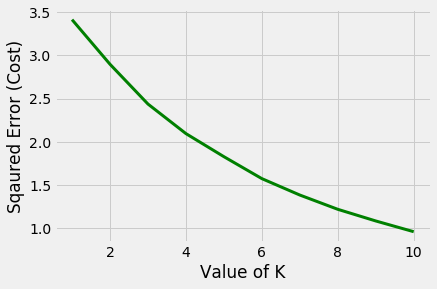

In [79]:
cost =[]

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500, random_state=0) 
    KM.fit(london_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

#### From the above figure we can see that elbow bend is when K = 6

In [80]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 1, 1, 5, 1, 1, 1, 5], dtype=int32)

In [86]:
#neighborhoods_venues_sorted.drop('Cluster Labels', axis=1, inplace=True) #Uncomment when re running to void error

In [87]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = neighborhood_data_lon
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Greater London,Shoreditch,51.5251,-0.0769,1,Coffee Shop,Pizza Place,Café,Sandwich Place,Hotel
1,Greater London,Stepney,51.5175,-0.0429,0,Park,Pub,Hotel,Café,Bakery
2,Greater London,Whitechapel,51.5138,-0.0658,1,Hotel,Coffee Shop,Indian Restaurant,Pub,Café
3,Greater London,Rotherhithe,51.5000,-0.0500,0,Pub,Café,History Museum,Metro Station,Performing Arts Venue
4,Greater London,Wapping,51.5051,-0.0568,1,Pub,Park,Coffee Shop,History Museum,Italian Restaurant


The table above shows each neighborhood sorted in top 5 most common venues and cluster label highlights clusters they belong to.

### Clustered London Map

In [88]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], 
                                  london_merged['Longitude'], 
                                  london_merged['Neighborhood'], 
                                  london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Note**: Please zoom out and zoom in on to london city and look for colored clusters, if some other city is shown other wise.

#### Lets examine the clusters

In [100]:
Cluster_1_london = london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
Cluster_1_london

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Stepney,Park,Pub,Hotel,Café,Bakery
3,Rotherhithe,Pub,Café,History Museum,Metro Station,Performing Arts Venue
14,Wanstead,Café,Grocery Store,Coffee Shop,Bakery,Pub
15,Leytonstone,Café,Pub,Fast Food Restaurant,Coffee Shop,Grocery Store
20,Plaistow,Platform,Rugby Pitch,Café,Park,Fish & Chips Shop
22,Newham,Pub,Café,Bus Station,Gym,Yoga Studio
26,Poplar,English Restaurant,Steakhouse,Café,Pizza Place,Light Rail Station
49,Walthamstow,Pub,Café,Middle Eastern Restaurant,Gas Station,Indian Restaurant


In [101]:
Cluster_2_london = london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
Cluster_2_london

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Shoreditch,Coffee Shop,Pizza Place,Café,Sandwich Place,Hotel
2,Whitechapel,Hotel,Coffee Shop,Indian Restaurant,Pub,Café
4,Wapping,Pub,Park,Coffee Shop,History Museum,Italian Restaurant
5,Mile End Road,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
6,Shadwell,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
7,Commercial Road,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
8,Stepney Green,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
9,Spitalfields,Coffee Shop,Chinese Restaurant,Food Truck,Restaurant,Cocktail Bar
10,Aldgate East,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
11,Leyton,Pub,Gym / Fitness Center,Grocery Store,Platform,Coffee Shop


In [102]:
Cluster_3_london = london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
Cluster_3_london

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Little Ilford,Pub,Asian Restaurant,Gas Station,Gym / Fitness Center,Restaurant
18,Manor Park,Pub,Asian Restaurant,Gas Station,Gym / Fitness Center,Restaurant
19,Aldersbrook,Pub,Asian Restaurant,Gas Station,Gym / Fitness Center,Restaurant


In [103]:
Cluster_4_london = london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
Cluster_4_london

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
45,North Woolwich,Pier,Boat or Ferry,Light Rail Station,Tunnel,Fast Food Restaurant


In [104]:
Cluster_5_london = london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
Cluster_5_london

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
40,Stratford,Hotel,Thai Restaurant,Platform,Bus Stop,Grocery Store
41,Pudding Mill Lane,Hotel,Thai Restaurant,Platform,Bus Stop,Grocery Store
42,Temple Mills,Hotel,Thai Restaurant,Platform,Bus Stop,Grocery Store
43,Stratford Marsh,Hotel,Thai Restaurant,Platform,Bus Stop,Grocery Store


In [105]:
Cluster_6_london = london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
Cluster_6_london

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
46,Custom House,Airport Service,Sandwich Place,Airport,Theater,Hotel
47,Victoria Docks,Airport Service,Sandwich Place,Airport,Theater,Hotel
48,Canning Town,Airport Service,Sandwich Place,Airport,Theater,Hotel


There are 6 clusters out of London city data 

### Sydney city neighborhood analysis and Clustering of Neighborhoods using K-Means

In [106]:
num_top_venues = 5
print("Top 5 most common venues of each neighborhood")
for hood in sydney_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sydney_grouped[sydney_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Top 5 most common venues of each neighborhood
----Australia Square----
           venue  freq
0    Coffee Shop  0.16
1   Cocktail Bar  0.08
2            Bar  0.08
3  Shopping Mall  0.08
4      Speakeasy  0.06


----Broadway----
          venue  freq
0   Coffee Shop  0.12
1           Bar  0.10
2  Cocktail Bar  0.10
3         Hotel  0.06
4     Speakeasy  0.06


----Chippendale----
         venue  freq
0         Café  0.18
1          Bar  0.06
2  Coffee Shop  0.04
3     Wine Bar  0.04
4  Art Gallery  0.04


----Darlinghurst----
                venue  freq
0                Café  0.24
1                 Bar  0.06
2  Italian Restaurant  0.06
3        Cocktail Bar  0.04
4           Bookstore  0.04


----Darlington----
                   venue  freq
0                   Café  0.24
1                    Pub  0.14
2     Italian Restaurant  0.07
3  Performing Arts Venue  0.07
4        Thai Restaurant  0.07


----Dawes Point----
                   venue  freq
0                   Café  0.18
1         

In [107]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sydney_grouped['Neighborhood']

for ind in np.arange(sydney_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sydney_grouped.iloc[ind, :], 
                                                                          num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Australia Square,Coffee Shop,Cocktail Bar,Shopping Mall,Bar,Bookstore
1,Broadway,Coffee Shop,Bar,Cocktail Bar,Hotel,Speakeasy
2,Chippendale,Café,Bar,Cocktail Bar,Hotel,Art Gallery
3,Darlinghurst,Café,Bar,Italian Restaurant,Bookstore,Burger Joint
4,Darlington,Café,Pub,Coffee Shop,Italian Restaurant,Beer Garden


### Finding the optimum K value for the sydney data using WCSS method

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight") 

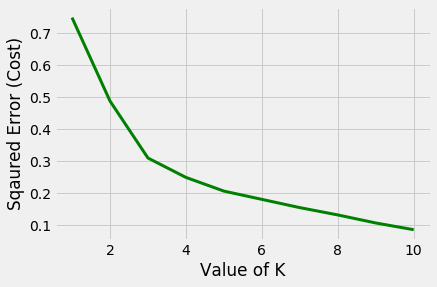

In [109]:
cost =[]

sydney_grouped_clustering = sydney_grouped.drop('Neighborhood', 1)

for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500, random_state=0) 
    KM.fit(sydney_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

#### From the above figure we can see that elbow bend is when K = 3

In [110]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans1 = KMeans(n_clusters=kclusters, random_state=0)
kmeans1.fit(sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans1.labels_[0:10] 

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 2], dtype=int32)

In [111]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans1.labels_)

sydney_merged = neighborhood_data_syd
sydney_merged = sydney_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sydney_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,SYDNEY STREETS,Australia Square,-33.8707,151.2068,1,Coffee Shop,Cocktail Bar,Shopping Mall,Bar,Bookstore
1,SYDNEY STREETS,Grosvenor Place,-33.8707,151.2068,1,Coffee Shop,Cocktail Bar,Shopping Mall,Bar,Bookstore
2,SYDNEY STREETS,Royal Exchange,-33.8707,151.2068,1,Coffee Shop,Cocktail Bar,Shopping Mall,Bar,Bookstore
3,SYDNEY STREETS,Queen Victoria Building,-33.8787,151.2053,2,Thai Restaurant,Japanese Restaurant,Hotel,Korean BBQ Restaurant,Malay Restaurant
4,SYDNEY STREETS,Sydney South,-33.8787,151.2053,2,Thai Restaurant,Japanese Restaurant,Hotel,Korean BBQ Restaurant,Malay Restaurant


### Clustered Sydney Map

In [112]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sydney_merged['Latitude'], 
                                  sydney_merged['Longitude'], 
                                  sydney_merged['Neighborhood'], 
                                  sydney_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Note**: Please zoom out and zoom in on to sydney city and look for colored clusters, if some other city is shown other wise.

#### Lets examine the clusters

In [115]:
Cluster_1_sydney = sydney_merged.loc[sydney_merged['Cluster Labels'] == 0, sydney_merged.columns[[1] + list(range(5, sydney_merged.shape[1]))]]
Cluster_1_sydney

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Darlinghurst,Café,Bar,Italian Restaurant,Bookstore,Burger Joint
7,Potts Point,Café,Australian Restaurant,Italian Restaurant,Hotel,Chinese Restaurant
8,Kings Cross,Café,Italian Restaurant,Australian Restaurant,Pizza Place,Gym
9,Sydney,Café,Pub,Hotel,Japanese Restaurant,Thai Restaurant
10,Millers Point,Café,Pub,Hotel,Bakery,Australian Restaurant
11,The Rocks,Café,Hotel,Pub,Australian Restaurant,Scenic Lookout
12,Dawes Point,Café,Australian Restaurant,Pub,Hotel,Brewery
15,Ultimo,Café,Coffee Shop,Supermarket,Pub,Malay Restaurant
17,Darlington,Café,Pub,Coffee Shop,Italian Restaurant,Beer Garden
18,Chippendale,Café,Bar,Cocktail Bar,Hotel,Art Gallery


In [116]:
Cluster_2_sydney = sydney_merged.loc[sydney_merged['Cluster Labels'] == 1, sydney_merged.columns[[1] + list(range(5, sydney_merged.shape[1]))]]
Cluster_2_sydney

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Australia Square,Coffee Shop,Cocktail Bar,Shopping Mall,Bar,Bookstore
1,Grosvenor Place,Coffee Shop,Cocktail Bar,Shopping Mall,Bar,Bookstore
2,Royal Exchange,Coffee Shop,Cocktail Bar,Shopping Mall,Bar,Bookstore
13,Eastern Suburbs Mc,Coffee Shop,Bar,Cocktail Bar,Hotel,Speakeasy
14,The University Of Sydney,Coffee Shop,Bar,Cocktail Bar,Hotel,Speakeasy
16,Broadway,Coffee Shop,Bar,Cocktail Bar,Hotel,Speakeasy


In [117]:
Cluster_3_sydney = sydney_merged.loc[sydney_merged['Cluster Labels'] == 2, sydney_merged.columns[[1] + list(range(5, sydney_merged.shape[1]))]]
Cluster_3_sydney

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Queen Victoria Building,Thai Restaurant,Japanese Restaurant,Hotel,Korean BBQ Restaurant,Malay Restaurant
4,Sydney South,Thai Restaurant,Japanese Restaurant,Hotel,Korean BBQ Restaurant,Malay Restaurant
5,Haymarket,Thai Restaurant,Japanese Restaurant,Hotel,Korean BBQ Restaurant,Malay Restaurant


Sydney has 3 clusters

### Singapore city neighborhood analysis and Clustering of Neighborhoods using K-Means

In [118]:
num_top_venues = 5
print("Top 5 most common venues of each neighborhood")
for hood in singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Top 5 most common venues of each neighborhood
----Bedok Avenue----
               venue  freq
0     Ice Cream Shop  0.12
1        Coffee Shop  0.12
2         Food Court  0.12
3  Hainan Restaurant  0.12
4        Supermarket  0.12


----Bedok Central----
                venue  freq
0          Food Court  0.06
1      Sandwich Place  0.06
2  Chinese Restaurant  0.06
3         Coffee Shop  0.06
4     Thai Restaurant  0.04


----Bedok Close----
                 venue  freq
0             Bus Line   0.4
1     Asian Restaurant   0.2
2          Flower Shop   0.2
3           Playground   0.2
4  American Restaurant   0.0


----Bedok Garden----
               venue  freq
0        Coffee Shop   0.1
1         Food Court   0.1
2           Bus Line   0.1
3  Hainan Restaurant   0.1
4   Malay Restaurant   0.1


----Bedok Industrial Park C----
                  venue  freq
0           Bus Station  0.11
1      Basketball Court  0.11
2             Pet Store  0.06
3  Gym / Fitness Center  0.06
4             

In [119]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = singapore_grouped['Neighborhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], 
                                                                          num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bedok Avenue,Coffee Shop,Food Court,Hainan Restaurant,Ice Cream Shop,Dessert Shop
1,Bedok Central,Coffee Shop,Sandwich Place,Chinese Restaurant,Food Court,Japanese Restaurant
2,Bedok Close,Bus Line,Asian Restaurant,Playground,Flower Shop,Wings Joint
3,Bedok Garden,Coffee Shop,Dessert Shop,Malay Restaurant,Bus Line,Smoke Shop
4,Bedok Industrial Park C,Basketball Court,Bus Station,Gym / Fitness Center,Convenience Store,Food Court


### Finding the optimum K value for the singapore data using WCSS method

In [120]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight") 

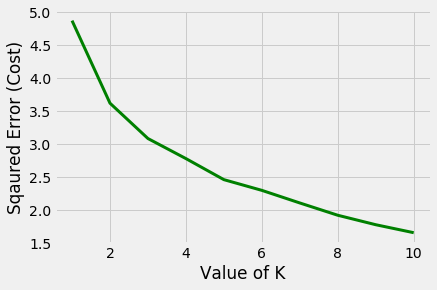

In [121]:
cost =[]

singapore_grouped_clustering = singapore_grouped.drop('Neighborhood', 1)

for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500, random_state=0) 
    KM.fit(singapore_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

#### From the above figure we can see that elbow bend is when K = 3

In [122]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0)
kmeans2.fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10] 

array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [123]:
#neighborhoods_venues_sorted.drop('Cluster Labels', axis=1, inplace=True) #Uncomment when re running to void error


In [124]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans2.labels_)

singapore_merged = neighborhood_data_sgp
singapore_merged = singapore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

singapore_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bedok Reservoir Road,Singapore,1.3304,103.9052,3,Coffee Shop,Food Court,Restaurant,Chinese Restaurant,Supermarket
1,Bedok South Avenue 1,Singapore,1.3209,103.9337,0,Bus Stop,Bubble Tea Shop,Noodle House,Fast Food Restaurant,Coffee Shop
2,Bedok South Avenue 2,Singapore,1.3222,103.9344,0,Bubble Tea Shop,Noodle House,French Restaurant,Café,Fried Chicken Joint
3,Bedok South Road,Singapore,1.3204,103.9367,0,Noodle House,Convenience Store,Food Court,Grocery Store,Chinese Restaurant
4,Bedok South Avenue 3,Singapore,1.3225,103.9427,3,Food Court,Coffee Shop,Noodle House,Convenience Store,Plaza


### Clustered Singapore Map

In [125]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['Latitude'], 
                                  singapore_merged['Longitude'], 
                                  singapore_merged['Neighborhood'], 
                                  singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Note**: Please zoom out and zoom in on to singapore city and look for colored clusters, if some other city is shown other wise.

#### Lets examine the clusters

In [126]:
Cluster_1_singapore = singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]
Cluster_1_singapore

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Singapore,Bus Stop,Bubble Tea Shop,Noodle House,Fast Food Restaurant,Coffee Shop
2,Singapore,Bubble Tea Shop,Noodle House,French Restaurant,Café,Fried Chicken Joint
3,Singapore,Noodle House,Convenience Store,Food Court,Grocery Store,Chinese Restaurant
6,Singapore,Coffee Shop,Chinese Restaurant,Noodle House,Fishing Store,Seafood Restaurant
7,Singapore,Chinese Restaurant,Noodle House,Coffee Shop,Seafood Restaurant,Café
8,Singapore,Chinese Restaurant,Coffee Shop,Thai Restaurant,Noodle House,Café
9,Singapore,Coffee Shop,Café,Thai Restaurant,Food Court,Sandwich Place
10,Singapore,Chinese Restaurant,Sushi Restaurant,Malay Restaurant,Supermarket,Fast Food Restaurant
11,Singapore,Coffee Shop,Sandwich Place,Chinese Restaurant,Food Court,Japanese Restaurant
12,Singapore,Chinese Restaurant,Sushi Restaurant,Supermarket,Malay Restaurant,Café


In [128]:
Cluster_2_singapore = singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]
Cluster_2_singapore

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
31,Singapore,Bus Line,Bus Station,Residential Building (Apartment / Condo),Trail,Arts & Entertainment
32,Singapore,Bus Line,Coffee Shop,Trail,Arts & Entertainment,Ice Cream Shop
34,Singapore,Bus Line,Bus Station,Trail,Arts & Entertainment,Salon / Barbershop
35,Singapore,Bus Line,Coffee Shop,Trail,Arts & Entertainment,Ice Cream Shop
36,Singapore,Bus Line,Trail,Arts & Entertainment,Flower Shop,Wings Joint
37,Singapore,Bus Line,Trail,Arts & Entertainment,Flower Shop,Bus Station


In [129]:
Cluster_3_singapore = singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]
Cluster_3_singapore

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
41,Singapore,Coffee Shop,Home Service,BBQ Joint,Bus Stop,French Restaurant
44,Singapore,Coffee Shop,Surf Spot,Plaza,Pizza Place,Fast Food Restaurant
45,Singapore,Coffee Shop,Pizza Place,Spa,Plaza,Pharmacy
46,Singapore,Coffee Shop,Spa,Cosmetics Shop,Pizza Place,Pharmacy
47,Singapore,Coffee Shop,South Indian Restaurant,Gym / Fitness Center,Indian Restaurant,Supermarket
48,Singapore,Coffee Shop,Fast Food Restaurant,Plaza,Deli / Bodega,Bakery


In [130]:
Cluster_4_singapore = singapore_merged.loc[singapore_merged['Cluster Labels'] == 3, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]
Cluster_4_singapore

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Singapore,Coffee Shop,Food Court,Restaurant,Chinese Restaurant,Supermarket
4,Singapore,Food Court,Coffee Shop,Noodle House,Convenience Store,Plaza
5,Singapore,Food Court,Coffee Shop,Convenience Store,Stadium,Noodle House
40,Singapore,Coffee Shop,Racetrack,Café,Food Court,Food Truck
42,Singapore,Seafood Restaurant,Fast Food Restaurant,Food Court,Coffee Shop,Wings Joint
43,Singapore,Coffee Shop,Bowling Alley,Fast Food Restaurant,Seafood Restaurant,Café


In [131]:
Cluster_5_singapore = singapore_merged.loc[singapore_merged['Cluster Labels'] == 4, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]
Cluster_5_singapore

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Singapore,Asian Restaurant,Bus Line,Noodle House,Playground,Flower Shop
21,Singapore,Asian Restaurant,Bus Line,Noodle House,Playground,Flower Shop
24,Singapore,Bus Line,Asian Restaurant,Playground,Flower Shop,Wings Joint


Singapore has 5 clusters

## Results <a name="results"></a>

### **Recommending** user some of the desired neighborhoods based on the stakeholders preferences

#### Lets take an example by taking user input, and say user passes a list of top 3 venues he thinks is near by his locality before he/she moves into the location or set up a business.

In [186]:
user_input = input('Please provide the desired venues for a locality separated by ",": ')

print("\n")
userList = user_input.split(',')
print("Desire venues as per user is ", userList)

Please provide the desired venues for a locality separated by ",":  Coffee Shop,Park,Plaza




Desire venues as per user is  ['Coffee Shop', 'Park', 'Plaza']


In [188]:
user_location = input('Please provide the desired location (London, Sydney, Singapore):')

print("\n")
print("Desire location as per user is ", user_location)

Please provide the desired location (London, Sydney, Singapore): London




Desire location as per user is  London


In [189]:
def select_loc(user_location):
    if user_location == 'London':
        return london_merged
    elif user_location == 'Sydney':
        return sydney_merged
    elif user_location == 'Singapore':
        return singapore_merged
    else:
        print('Please Enter the correct desired location (London, Sydney, Singapore)')

In [190]:
location_selected_df = select_loc(user_location)

In [191]:
location_selected_df.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Greater London,Shoreditch,51.5251,-0.0769,1,Coffee Shop,Pizza Place,Café,Sandwich Place,Hotel
1,Greater London,Stepney,51.5175,-0.0429,0,Park,Pub,Hotel,Café,Bakery
2,Greater London,Whitechapel,51.5138,-0.0658,1,Hotel,Coffee Shop,Indian Restaurant,Pub,Café
3,Greater London,Rotherhithe,51.5000,-0.0500,0,Pub,Café,History Museum,Metro Station,Performing Arts Venue
4,Greater London,Wapping,51.5051,-0.0568,1,Pub,Park,Coffee Shop,History Museum,Italian Restaurant


#### Using user input and clusters made we can recommend the user to check the neighborhoods, also we can highlight the cluster number if the user wants to know more about neighboring venues and neighborhoods.

In [192]:
Row_list =[] 
  
# Iterate over each row 
for index, rows in location_selected_df.iterrows(): 
    # Create list for the current row 
    my_list =[rows['Cluster Labels'],rows['Neighborhood'], rows['1st Most Common Venue'],
              rows['2nd Most Common Venue'], rows['3rd Most Common Venue'],
              rows['4th Most Common Venue'], rows['5th Most Common Venue']]
    set1 = set(userList)
    set2 = set(my_list)
    #check if user list is subset of my_list
    is_subset = set1.issubset(set2)
    if is_subset == True:
    # append the list to the final list 
        Row_list.append(my_list) 
        
Row_list

[[1,
  'Canary Wharf',
  'Coffee Shop',
  'Park',
  'Gym / Fitness Center',
  'Italian Restaurant',
  'Plaza'],
 [1,
  'Westferry',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'South Quay',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'London Arena',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'Coldharbour',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'All Saints',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'Heron Quays',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'West India Quay',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'Mudchute',
  'Coffee Shop',
  'Gym / Fitness Center',
  'Park',
  'Plaza',
  'Pizza Place'],
 [1,
  'East India Dock Road',
  'Coffee Shop',
  'Gym / F

The Cluster details are:

In [196]:
cluster_no = Row_list[0][0]

In [199]:
def cluster_detail(user_location, cluster_no):
    if user_location == 'London':
        if cluster_no == 0:
            return Cluster_1_london
        elif cluster_no == 1:
            return Cluster_2_london
        elif cluster_no == 2:
            return Cluster_3_london
        elif cluster_no == 3:
            return Cluster_4_london
        elif cluster_no == 4:
            return Cluster_5_london
        else:
            return Cluster_6_london
    elif user_location == 'Sydney':
        if cluster_no == 0:
            return Cluster_1_sydney
        elif cluster_no == 1:
            return Cluster_2_sydney
        else:
            return Cluster_3_sydney
    elif user_location == 'Singapore':
        if cluster_no == 0:
            return Cluster_1_singapore
        elif cluster_no == 1:
            return Cluster_2_singapore
        elif cluster_no == 2:
            return Cluster_3_singapore
        elif cluster_no == 3:
            return Cluster_4_singapore
        else:
            return Cluster_5_singapore
    else:
        print('Invalid Location!!')
        
cluster_detail(user_location,cluster_no)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Shoreditch,Coffee Shop,Pizza Place,Café,Sandwich Place,Hotel
2,Whitechapel,Hotel,Coffee Shop,Indian Restaurant,Pub,Café
4,Wapping,Pub,Park,Coffee Shop,History Museum,Italian Restaurant
5,Mile End Road,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
6,Shadwell,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
7,Commercial Road,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
8,Stepney Green,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
9,Spitalfields,Coffee Shop,Chinese Restaurant,Food Truck,Restaurant,Cocktail Bar
10,Aldgate East,Grocery Store,Coffee Shop,Dive Bar,Hotel,Indian Restaurant
11,Leyton,Pub,Gym / Fitness Center,Grocery Store,Platform,Coffee Shop


##### Above table shows the cluster of neighborhoods which matches based on user top 3 desired venues.
Purpose of this project was to only provide information on areas close to cities center and residential places.
Recommended neighborhoods should be considered as a reference which can be further more analysed or grouped with other places to see if the desired location to shift or setup a business is more ideal.

## Discussion & Further Recommendation <a name="discussion"></a>

We can try with **DBSCAN clustering** to avoid outliers, as kmeans is very prone to be biased due to presence of outliers. There is further more analysis where we can consider more number of data points or locations with advance Foursqaure API plan which allows more API hits quota. Which then has multiple outliers some locations are far away from a cluster and KMeans is biased to such outliers and its then when we can use DBSCAN and also KMedians clustering. Below are few snippets of code which we can try for further practice with more data

    Snippet of DBSCAN for this project:
    from sklearn.cluster import DBSCAN 
    from sklearn.preprocessing import StandardScaler 
    import matplotlib.pyplot as plt 
    london_grouped_clustering = london_grouped.drop(['Neighborhood'] , 1)
    london_grouped_clustering = london_grouped_clustering
    Clus_dataSet = np.nan_to_num(london_grouped_clustering)
    Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
    # Compute DBSCAN
    db = DBSCAN(eps=0.15, min_samples=3).fit(Clus_dataSet)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(labels)

Be it any city the neighborhoods are clustered either with coffee houses, cafes and hotels together, or with residentials, bus stations, bus lines, or with pubs parks, there are clusters specifically identifying vicinities closer to Airport and airport services.
FourSquare API provides venues in detailed manner, when it comes to Restaurants where neighborhoods are clustered with cuisine based restaurants, such that the user can search for the locality with specific cuisine restaurants like Indian, Thai, Chinese etc. Clusters are also made up of sandwich plaza, pizza plaza. 

Further improvement can be made on this project, by using more neighborhoods and boroughs without any limitations of using Sandbox version of FourSquare API, to get additional quoatas.
Cities considered here are mainly keeping in mind the business advantages this cities provide based on geographic locations like Europe(London), APAC(Singapore), ANZ(Sydney), more cities can be compared and considered. 

## Conclusion <a name="conclusion"></a>

**The purpose of this project was to find similarity within the city's neighborhoods for stakeholders to decide which location suits their preferences**,

If a user or agent wants to move or shift from his current city locality to another city, this is to serve the purpose of the stakeholder to decide whether to shift to which part of the city or which different city he/she wants to move. The target audience or the stakeholders can either be an individual looking to relocate or a business contractor who wants to start or expand his business to new city. 

The project considers only on 3 cities London, Sydney and Singapore, but as mentioned before more cities can be considered with more number of areas/boroughs.

**London**: Good foundation, of course, is good for business. In London, it's easy to provide personal service to millions of potential customers within the city itself, across the U.K. and around the world. London's geographical positioning is uniquely advantageous.A large number of people move to London in their 20s, drawn from all corners of the country. This is because of the range and number of job opportunities that the capital offers.

**Sydney**: Sydney possesses a range of important economic advantages and attributes, including strong clusters of high value industries and closely-linked sectors, international connections and a highly skilled pool of workers attracted to Sydney's unique lifestyle.Sydney — a coastal metropolis whose five million residents make it the largest city in Australia — is famous for many things. The glittering harbour, complemented by landmarks like the Sydney Opera House and the Sydney Harbour Bridge. The dozens of sun-bathed beaches peppering the spectacular coastline

**Singapore**: Singapore has a well-developed free market economy that is based primarily on trade, finance and manufacturing. Services account for 75% of the country's GDP and employ 80% of its workforce. The country has managed to achieve very low unemployment rate while maintaining low inflation.With its high standard of living, business friendly climate and the ability to live and work in English, the city-state of Singapore is a very popular destination for both immigrants and expats.

Locations like **New York, San Fracisco, Toronto, Quebec, Bangalore, Mumbai, Amsterdam, Barcelona, Shanghai, Tokyo** and many more can be considered into this analysis.

### Thank You!!